# Put comma using Force Alignment

Put commas on ASR output using Force Alignment model.

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/put-comma-force-alignment](https://github.com/huseinzol05/malaya-speech/tree/master/example/put-comma-force-alignment).
    
</div>

<div class="alert alert-warning">

This module is not language independent, so it not save to use on different languages. Pretrained models trained on hyperlocal languages.
    
</div>

In [1]:
import malaya_speech
import numpy as np
from malaya_speech import Pipeline
import IPython.display as ipd
import matplotlib.pyplot as plt

### List available Force Aligner model

In [2]:
malaya_speech.force_alignment.available_aligner()

,Size (MB),Quantized Size (MB),Language
conformer-transducer,120,32.3,[malay]
conformer-transducer-mixed,120,32.3,[mixed]
conformer-transducer-singlish,120,32.3,[singlish]


### Load Force Aligner model

```python
def deep_aligner(
    model: str = 'conformer-transducer', quantized: bool = False, **kwargs
):
    """
    Load Deep Aligner model.

    Parameters
    ----------
    model : str, optional (default='conformer-transducer')
        Model architecture supported. Allowed values:

        * ``'conformer-transducer'`` - Conformer + RNNT trained on Malay STT dataset.
        * ``'conformer-transducer-mixed'`` - Conformer + RNNT trained on Mixed STT dataset.
        * ``'conformer-transducer-singlish'`` - Conformer + RNNT trained on Singlish STT dataset.

    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model.
        Quantized model not necessary faster, totally depends on the machine.

    Returns
    -------
    result : malaya_speech.model.tf.TransducerAligner class
    """
```

In [3]:
model = malaya_speech.force_alignment.deep_aligner(model = 'conformer-transducer')

### Load sample

#### Malay samples

In [4]:
malay1, sr = malaya_speech.load('speech/example-speaker/shafiqah-idayu.wav')
malay2, sr = malaya_speech.load('speech/example-speaker/haqkiem.wav')

In [5]:
texts = ['nama saya shafiqah idayu',
        'sebagai pembangkang yang matang dan sejahtera pas akan menghadapi pilihan raya umum dan tidak menumbang kerajaan dari pintu belakang']

In [25]:
ipd.Audio(malay2, rate = sr)

### Predict

```python
def predict(self, input, transcription: str):
    """
    Transcribe input, will return a string.

    Parameters
    ----------
    input: np.array
        np.array or malaya_speech.model.frame.Frame.
    transcription: str
        transcription of input audio

    Returns
    -------
    result: Dict[words_alignment, subwords_alignment, subwords, alignment]
    """
```

#### Predict Malay

Our original text is: 'sebagai pembangkang yang matang dan sejahtera pas akan menghadapi pilihan raya umum dan tidak menumbang kerajaan dari pintu belakang'

In [26]:
results = model.predict(malay2, texts[1])

In [27]:
results.keys()

dict_keys(['words_alignment', 'subwords_alignment', 'subwords', 'alignment'])

In [28]:
results['words_alignment']

[{'text': 'sebagai', 'start': 0.08, 'end': 0.45},
 {'text': 'pembangkang', 'start': 0.56, 'end': 1.05},
 {'text': 'yang', 'start': 1.16, 'end': 1.29},
 {'text': 'matang', 'start': 1.4, 'end': 1.69},
 {'text': 'dan', 'start': 1.84, 'end': 1.85},
 {'text': 'sejahtera', 'start': 2.08, 'end': 2.57},
 {'text': 'pas', 'start': 2.84, 'end': 2.85},
 {'text': 'akan', 'start': 3.12, 'end': 3.33},
 {'text': 'menghadapi', 'start': 3.4, 'end': 3.93},
 {'text': 'pilihan', 'start': 4.04, 'end': 4.45},
 {'text': 'raya', 'start': 4.56, 'end': 4.81},
 {'text': 'umum', 'start': 4.88, 'end': 5.17},
 {'text': 'dan', 'start': 5.36, 'end': 5.37},
 {'text': 'tidak', 'start': 5.56, 'end': 5.73},
 {'text': 'menumbang', 'start': 5.84, 'end': 6.25},
 {'text': 'kerajaan', 'start': 6.36, 'end': 6.85},
 {'text': 'dari', 'start': 7.04, 'end': 7.25},
 {'text': 'pintu', 'start': 7.36, 'end': 7.53},
 {'text': 'belakang', 'start': 7.68, 'end': 8.05}]

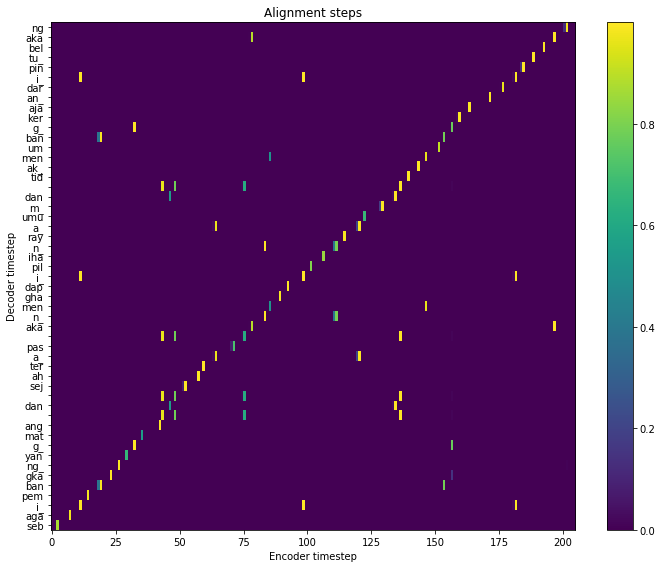

In [29]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_title('Alignment steps')
im = ax.imshow(
    results['alignment'],
    aspect='auto',
    origin='lower',
    interpolation='none')
ax.set_yticks(range(len(results['subwords'])))
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_yticklabels(results['subwords'])
fig.colorbar(im, ax=ax)
xlabel = 'Encoder timestep'
plt.xlabel(xlabel)
plt.ylabel('Decoder timestep')
plt.tight_layout()
plt.show()

If you listen to the audio, there is a silent between `pas` and `akan`, this we can assume a comma between those words. We can use `malaya_speech.aligner.put_comma` to help us,

```python
def put_comma(alignment, min_threshold: float = 0.5):
    """
    Put comma in alignment from force alignment model.

    Parameters
    -----------
    alignment: List[Dict[text, start, end]]
    min_threshold: float, optional (default=0.5)
        minimum threshold in term of seconds to assume a comma.

    Returns
    --------
    result: List[str]
    """
```

In [30]:
malaya_speech.aligner.put_comma(results['words_alignment'], 0.25)

['sebagai',
 'pembangkang',
 'yang',
 'matang',
 'dan',
 'sejahtera',
 ',',
 'pas',
 ',',
 'akan',
 'menghadapi',
 'pilihan',
 'raya',
 'umum',
 'dan',
 'tidak',
 'menumbang',
 'kerajaan',
 'dari',
 'pintu',
 'belakang',
 '.']